In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load the dataset
data = pd.read_csv("/content/twitter_training.csv")

print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [ ]:
# Assign the correct column names
data.columns = ['ID', 'Entity', 'Sentiment', 'Text']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# Check for missing values
print(data.isnull().sum())

ID             0
Entity         0
Sentiment      0
Text         686
dtype: int64


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Handle potential missing values
    if pd.isna(text):
        return ""  # Replace NaN with empty string

    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_text'] = data['Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the tweet
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)


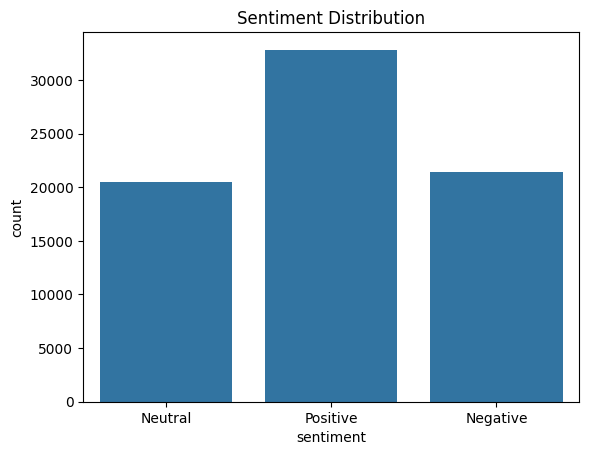

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()



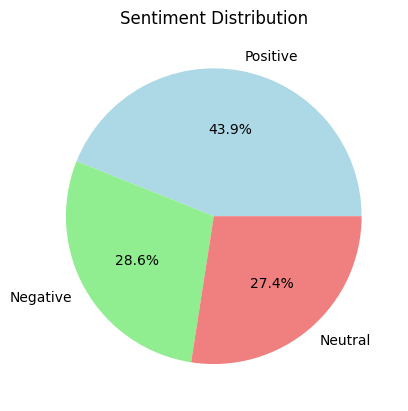

In [ ]:

# Pie chart for sentiment distribution
data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

sentiment                          Negative   Neutral  Positive
Entity                                                         
Amazon                             0.192573  0.272021  0.535406
ApexLegends                        0.284933  0.269360  0.445707
AssassinsCreed                     0.220588  0.187166  0.592246
Battlefield                        0.183291  0.400256  0.416454
Borderlands                        0.251641  0.203063  0.545295
CS-GO                              0.290365  0.228733  0.480903
CallOfDuty                         0.373434  0.203008  0.423559
CallOfDutyBlackopsColdWar          0.373316  0.260522  0.366162
Cyberpunk2077                      0.250434  0.263889  0.485677
Dota2                              0.278342  0.275804  0.445854
FIFA                               0.366667  0.253846  0.379487
Facebook                           0.334599  0.283966  0.381435
Fortnite                           0.335092  0.265172  0.399736
Google                             0.267

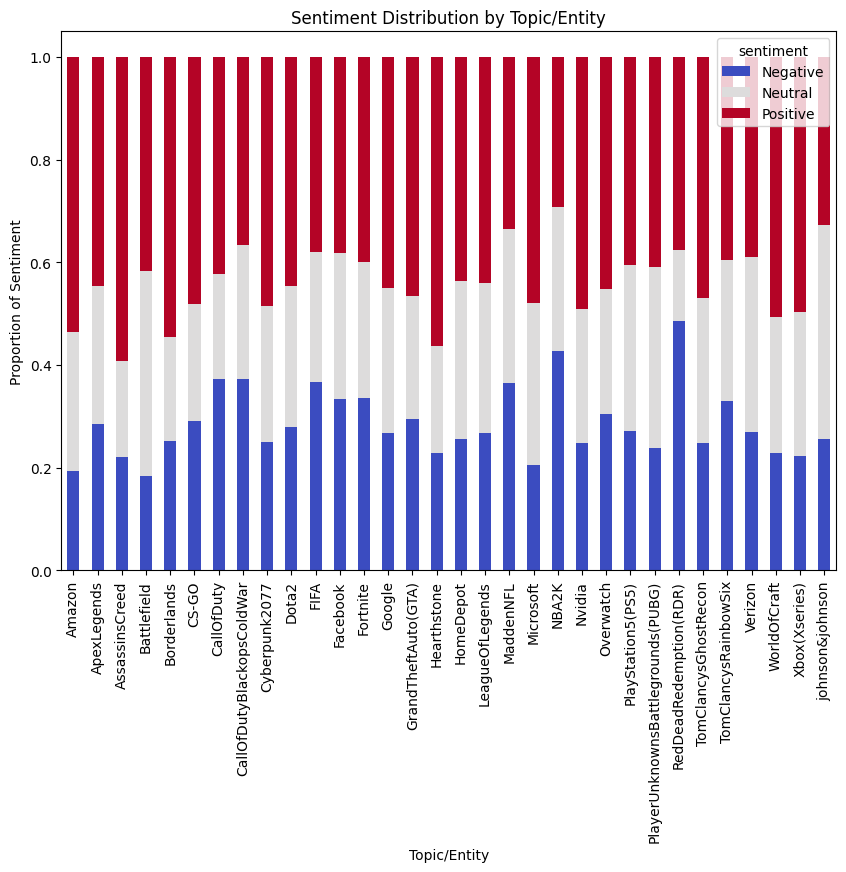

In [ ]:
# Group by topics/entities
topic_sentiment = data.groupby('Entity')['sentiment'].value_counts(normalize=True).unstack()
print(topic_sentiment)

# Visualization
topic_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,7))
plt.title('Sentiment Distribution by Topic/Entity')
plt.xlabel('Topic/Entity')
plt.ylabel('Proportion of Sentiment')
plt.show()
